<a href="https://colab.research.google.com/github/AaronRM9416/Core-Classwork/blob/main/Analysis_of_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aaron Musselwhite

9/14/22

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df= pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSLCr_9-fTI1jh759n99DqM-ZDTvulxm8Vgc3IDFrbnSy_Ci4VrNC--GsKUQC6O7skKH3jD--P38qgJ/pub?output=csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [ ]:
df.duplicated().any()

False

In [ ]:
df.isna().any()

Customer Id        False
Age                False
Edu                False
Years Employed     False
Income             False
Card Debt          False
Other Debt         False
Defaulted           True
DebtIncomeRatio    False
dtype: bool

In [ ]:
df['Defaulted'].fillna(df['Defaulted'].mean(),inplace=True)

In [ ]:
DearSlim = StandardScaler()
DearSlim_df = pd.DataFrame(DearSlim.fit_transform(df), columns=df.columns)

Text(0, 0.5, 'inertia')

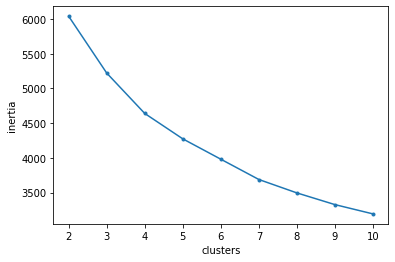

In [ ]:
inertias = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(DearSlim_df)  
    inertias.append(kmeans.inertia_)

plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

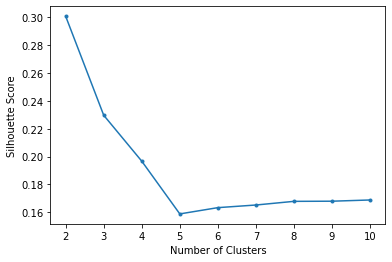

In [ ]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(DearSlim_df)
  silhouette_scores.append(silhouette_score(DearSlim_df, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(DearSlim_df)
silhouette_score(DearSlim_df, kmeans.labels_)

0.30074740495238034

# i chose 2 based on the silhoutte score

# Analysis Core

9/14/22

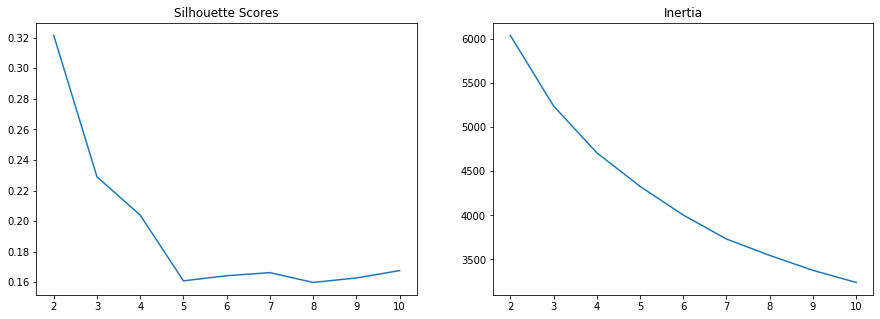

In [ ]:
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(DearStan_df)                    ## plotting silhoutte and elbow to find my clusters                     
  sils.append(silhouette_score(DearStan_df, kmeans.labels_))
  inertias.append(kmeans.inertia_)
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(DearStan_df)

KMeans(n_clusters=2, random_state=42)

In [ ]:
DearStan_df['cluster'] = kmeans.labels_
DearStan_df.head()                                        #adding cluster column

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,-1.730014,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.655603,-0.576525,0
1,-1.725939,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.655603,0.391387,1
2,-1.721863,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.852167,1.597554,1
3,-1.717788,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.655603,-0.576525,0
4,-1.713713,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.655603,-0.442507,1


In [ ]:
cluster_groups = DearStan_df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,0.021006,-0.244359,-0.067191,-0.300687,-0.334006,-0.305843,-0.344183,0.002413,-0.159889
1,1,-0.078742,0.916004,0.251873,1.127156,1.252058,1.146484,1.290205,-0.009046,0.599361


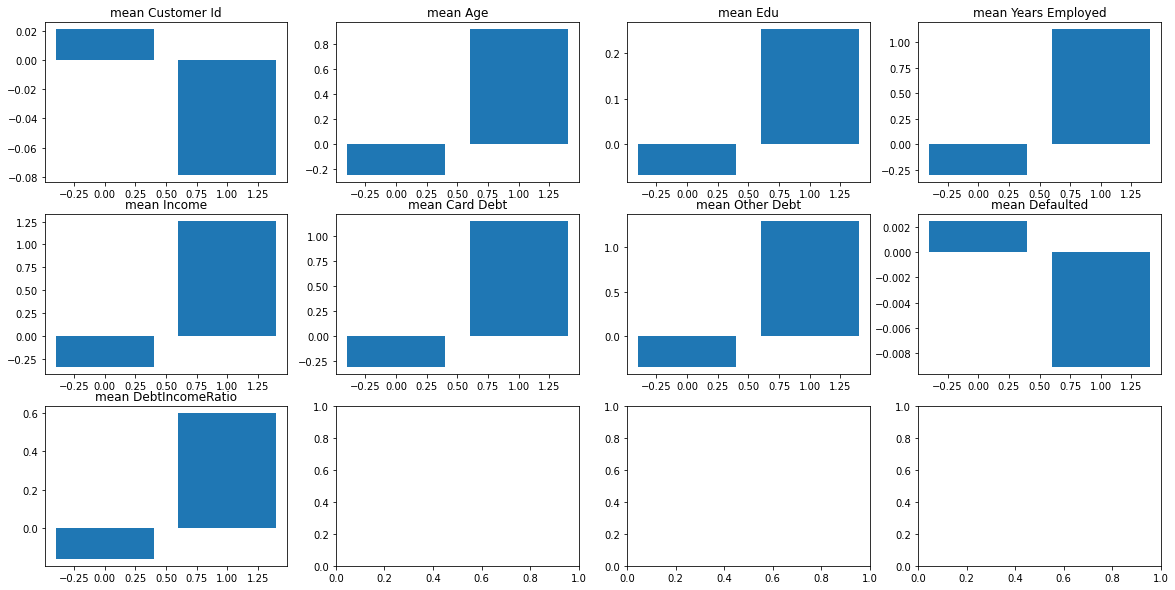

In [ ]:
fig, axes = plt.subplots(3,4, figsize = (20, 10))
axes = axes.ravel()
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'mean {col}')                           #finally, plotting the mean of each cluster based on the column

#Cluster 1:

from age all the way down to debt you can see that this group has only dipped their feet into credit cards. we can see from the Age diagram that this group is rather young in age and has not really delved very deep into the credit world nor have they accrued much debt via automobiles or housing.

#Cluster 2:

The second cluster is much higher across the board. From this, ive concluded that this cluster is consisting of people who have spent longer in the workforce and has a higher need in most cases of the amount of debt they have accrued. Whether it be gas, housing, auto loans, etc... 

#Suggestion: 

1) While there is a higher default rate amonsgt the second cluster, i think it would be prudent to give a little bit of wiggle room for this cluster as there is a higher need. 
